In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Define the parent directory
parent_directory = "data-with-optimal-surrogate/myopic_bayesopt"

# Initialize a dictionary to store the data frames
dfs_opt = {}

# Get a list of all subdirectories inside the parent directory
subdirectories = [d for d in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, d))]

# Loop through each subdirectory
for testfn_name in subdirectories:
    subdirectory_path = os.path.join(parent_directory, testfn_name)
    
    # Get a list of all CSV files inside the subdirectory
    csv_files = [f for f in os.listdir(subdirectory_path) if f.endswith('.csv') and "observations" not in f]
    
    # Initialize a dictionary to store CSV data frames for this subdirectory
    subdirectory_data = {}
    
    # Loop through each CSV file
    for csv_file in csv_files:
        csv_file_path = os.path.join(subdirectory_path, csv_file)
        
        # Read the CSV file into a pandas data frame
        csv_data_frame = pd.read_csv(csv_file_path)
        
        # Store the data frame in the subdirectory_data dictionary using the filename as key
        fn = csv_file.split(".")[0]
        subdirectory_data[fn] = csv_data_frame
    
    # Store the subdirectory_data dictionary in the main data_frames dictionary using the subdirectory name as key
    dfs_opt[testfn_name] = subdirectory_data

In [14]:
# Define the parent directory
parent_directory = "data-without-optimal-surrogate/myopic_bayesopt"

# Initialize a dictionary to store the data frames
dfs_without_opt = {}

# Get a list of all subdirectories inside the parent directory
subdirectories = [d for d in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, d))]

# Loop through each subdirectory
for testfn_name in subdirectories:
    subdirectory_path = os.path.join(parent_directory, testfn_name)
    
    # Get a list of all CSV files inside the subdirectory
    csv_files = [f for f in os.listdir(subdirectory_path) if f.endswith('.csv') and "observations" not in f]
    
    # Initialize a dictionary to store CSV data frames for this subdirectory
    subdirectory_data = {}
    
    # Loop through each CSV file
    for csv_file in csv_files:
        csv_file_path = os.path.join(subdirectory_path, csv_file)
        
        # Read the CSV file into a pandas data frame
        csv_data_frame = pd.read_csv(csv_file_path)
        
        # Store the data frame in the subdirectory_data dictionary using the filename as key
        fn = csv_file.split(".")[0]
        subdirectory_data[fn] = csv_data_frame
    
    # Store the subdirectory_data dictionary in the main data_frames dictionary using the subdirectory name as key
    dfs_without_opt[testfn_name] = subdirectory_data

In [29]:
sum_dfs = dict()
ei_dfs = []
poi_dfs = []
ucb_dfs = []

for testfn_name in dfs_opt.keys():
    ei_dfs.append(dfs_opt[testfn_name]["ei_gaps"])
    poi_dfs.append(dfs_opt[testfn_name]["poi_gaps"])
    ucb_dfs.append(dfs_opt[testfn_name]["ucb_gaps"])

final_ei_df = pd.concat(ei_dfs)
final_poi_df = pd.concat(poi_dfs)
final_ucb_df = pd.concat(ucb_dfs)

In [30]:
# final_ei_df.drop("trial").mean(axis=0)
final_ei_df.drop("trial", axis=1).mean(axis=0)

0    -0.096154
1     0.405587
2     0.511519
3     0.564844
4     0.587370
5     0.620683
6     0.640023
7     0.644965
8     0.646653
9     0.647194
10    0.656640
11    0.672805
12    0.682355
13    0.689598
14    0.695617
15    0.695940
dtype: float64

In [28]:
# final_ei_df.drop("trial").mean(axis=0)
final_ei_df.drop("trial", axis=1).mean(axis=0)

0    -0.090909
1     0.397303
2     0.512066
3     0.537789
4     0.573043
5     0.588156
6     0.613368
7     0.625979
8     0.638774
9     0.646016
10    0.657607
11    0.668494
12    0.673775
13    0.682662
14    0.686093
15    0.687677
dtype: float64

<Axes: >

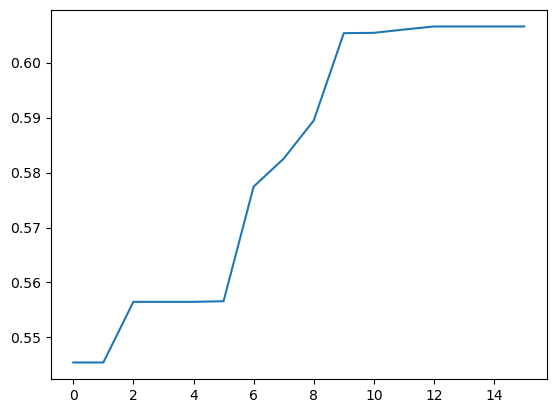

In [20]:
final_poi_df.drop("trial", axis=1).mean(axis=0).plot()

<Axes: >

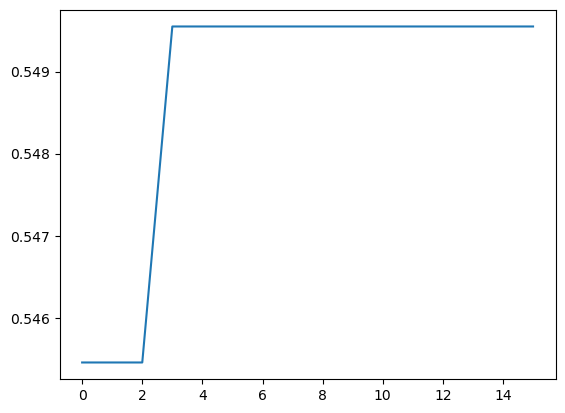

In [21]:
final_ucb_df.drop("trial", axis=1).mean(axis=0).plot()